# Python for Probability: Bridging the Gap Between Math and Code

<!-- ![bus-meme.jpeg](media/bus-meme.jpeg) -->
<div style="display: flex; justify-content: center;">
    <img src="media/bus-meme.jpeg" style="width:40%; margin:auto"/>
</div>
<br>

In this notebook, we will explore key concepts in probability theory, solve challenging probability problems using Python, and apply Monte Carlo simulations for real-world applications.

We will use the following libraries:
- `random`: For random number generation.
- `numpy`: For handling arrays and numerical operations.
- `scipy`: For probability distributions and statistical functions.
- `matplotlib`: For data visualization.

# Why Python?

<div>
    <img src="media/python-supreme.jpeg" width="40%"/>
    <!-- <br> -->
    <img src="media/python-meme.jpeg" width="55%"/>
</div>


### print("hello world!")

## Basic Probability Theory

<div style="display: flex; justify-content: center;">
    <img src="media/normal.png" style="max-height:90vh;width:85%; margin:auto"/>
</div>

### **Probability**

Probability is a branch of mathematics that deals with the likelihood of events occurring. Let's start with some basic definitions:

### **Probability of an Event**

In probability theory, the probability of an event is a measure of how likely the event is to occur. It is a value between 0 and 1, where:
- **0** means the event will not occur.
- **1** means the event will certainly occur.

The **probability of an event (A)**, denoted by $P(A)$, is calculated as the ratio of the **number of favorable outcomes** to the **total number of possible outcomes** in the sample space.

#### **Formula for Probability:**

$$
P(A) = \frac{\text{Number of favorable outcomes}}{\text{Total number of possible outcomes}}
$$

Where:
- **Favorable outcomes**: The outcomes that result in the event you’re interested in.
- **Total outcomes**: The total number of possible outcomes in the sample space.

#### **Example 1: Coin Toss**
- If you toss a fair coin, there are two possible outcomes: **Heads** or **Tails**.
- The event "getting Heads" has **1 favorable outcome** (Heads).
- The **total number of outcomes** is 2 (Heads, Tails).

The probability of getting Heads is:

$$
P(\text{Heads}) = \frac{1}{2} = 0.5
$$

#### **Example 2: Rolling a Die**
- A fair 6-sided die has 6 possible outcomes: **1, 2, 3, 4, 5, 6**.
- If the event is "rolling a 3," there is only **1 favorable outcome** (3).
- The **total number of outcomes** is 6.

The probability of rolling a 3 is:

$$
P(\text{Rolling a 3}) = \frac{1}{6} \approx 0.1667
$$

## **Laws of Probability**

<div style="display: flex; justify-content: center;">
    <img src="media/laws-of-probability.png" style="max-height:90vh;width:80%; margin:auto"/>
</div>
<!-- ![laws-of-probability.png](media/laws-of-probability.png) -->

## Quiz: Can you identify what is being shown in this image and explain its significance?

<div style="display: flex; justify-content: center;">
    <img src="media/cloudflare-lava.jpeg" style="max-height:90vh;width:70%; margin:auto"/>
</div>

## How do lava lamps help with Internet encryption? | Cloudflare: https://www.cloudflare.com/learning/ssl/lava-lamp-encryption/

<div style="display: flex; justify-content: center;">
    <img src="media/cloudflare-article.png" style="max-height:90vh;width:80%; margin:auto"/>
</div>
<!-- ![image.png](media/cloudflare-article.png) -->

## The Python Standard Library » Numeric and Mathematical Modules » random — Generate pseudo-random numbers

### random — Generate pseudo-random numbers
Source code: Lib/random.py

This module implements pseudo-random number generators for various distributions. Python uses the **`Mersenne Twister`** as the core generator. 

Almost all module functions depend on the basic function random(), which generates a random float uniformly in the half-open range 0.0 <= X < 1.0. 

In [4]:
import random

## Hello World for Probability: Simple Coin Toss

Let's calculate the probability of getting heads when tossing a fair coin.

In [9]:
import random

coin = ["H", "T"]

# Function to simulate a single coin toss
def coin_toss():
    return random.choice(coin)

N = 10

# Simulate tossing the coin 10 times
tosses = [coin_toss() for _ in range(N)]
print(tosses)

# Calculate probability of heads
heads_prob = tosses.count('H') / N
print(f"Probability of Heads: {heads_prob:.2f}")

['H', 'T', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'H']
Probability of Heads: 0.80


### Visualization

Let's visualize the probability distribution as a function of N

![image.png](media/import.png)

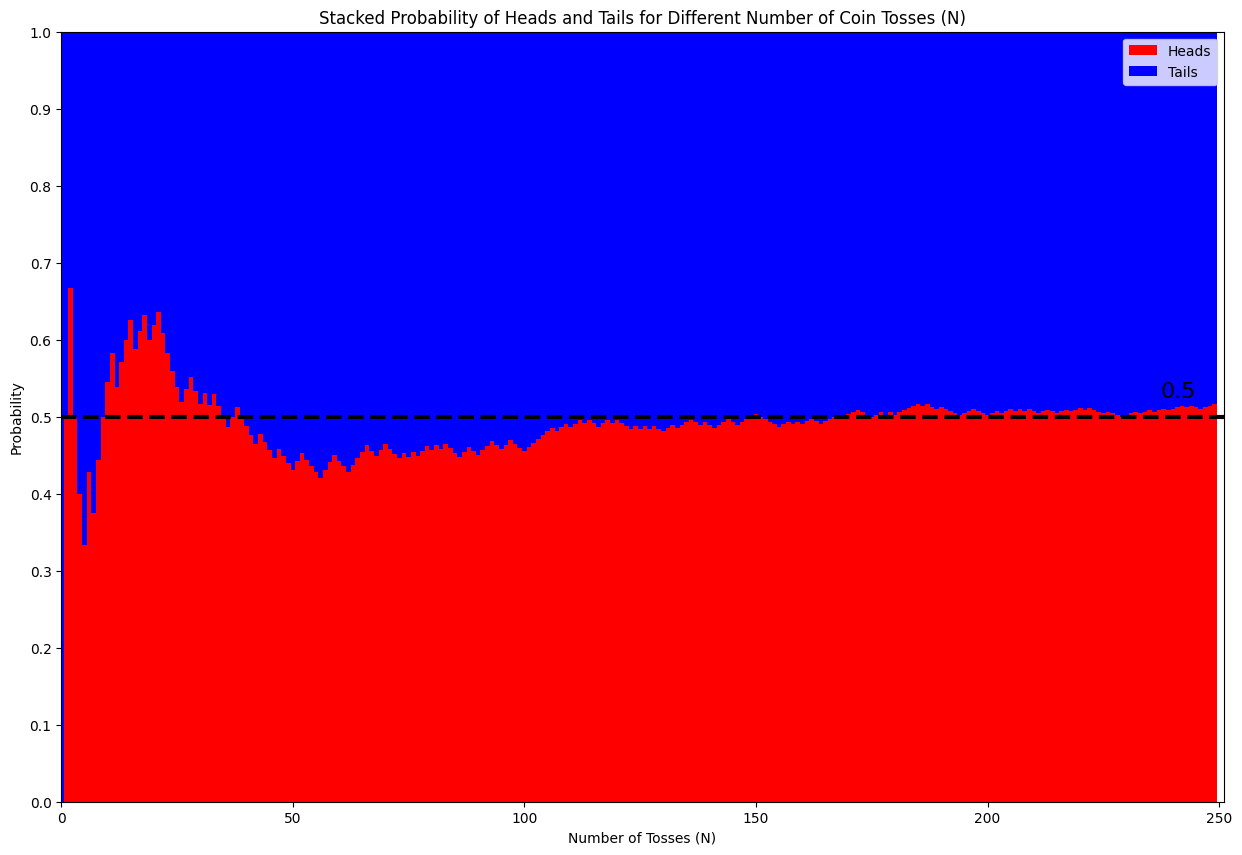

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def coin_tosses(num_tosses):
    return np.random.choice(['H', 'T'], size=num_tosses)

def simulate_coin_tosses(num_tosses):
    tosses = coin_tosses(num_tosses)
    heads_count = np.cumsum(tosses == 'H')
    tails_count = np.cumsum(tosses == 'T')
    heads_probabilities = heads_count / np.arange(1, num_tosses + 1)
    tails_probabilities = tails_count / np.arange(1, num_tosses + 1)
    return heads_probabilities, tails_probabilities

np.random.seed(420)
toss_counts = 250

# Get the probability of Heads and Tails for each N
heads_probabilities, tails_probabilities = simulate_coin_tosses(toss_counts)

# Plot the stacked bar graph for the probabilities of Heads and Tails for each N
bar_width = 1
index = np.arange(toss_counts)
plt.figure(figsize=(15, 10))
plt.bar(index, heads_probabilities, bar_width, label='Heads', color='red', edgecolor = "none")
plt.bar(index, tails_probabilities, bar_width, bottom=heads_probabilities, label='Tails', color='blue', edgecolor = "none")

# Formatting
plt.xlim(0,toss_counts+1)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=3)
plt.text(245, 0.5 + 0.02, "0.5", color="black", fontsize=16, verticalalignment="bottom", horizontalalignment="right")
plt.title("Stacked Probability of Heads and Tails for Different Number of Coin Tosses (N)")
plt.xlabel("Number of Tosses (N)")
plt.ylabel("Probability")
plt.legend()
plt.show()

## Dice Roll Simulation 🎲

Let's simulate rolling a 6-sided die and estimate the probability of rolling a certain number.

### Single Dice Roll

In [12]:
import numpy as np

# Simulate rolling a die once
die = np.random.randint(1, 7)
print(f"Result of dice roll: {die}")

Result of dice roll: 4


### Multiple Dice Rolls

In [23]:
N = 100
# np.random.seed(69)
rolls = np.random.randint(1, 7, size=N)

# Simulate rolling the die 100 times
for i in range(1, 7):
    print(f"Probability of rolling {i}: {np.sum(rolls == i) / N:.2f}")

Probability of rolling 1: 0.19
Probability of rolling 2: 0.19
Probability of rolling 3: 0.11
Probability of rolling 4: 0.17
Probability of rolling 5: 0.19
Probability of rolling 6: 0.15


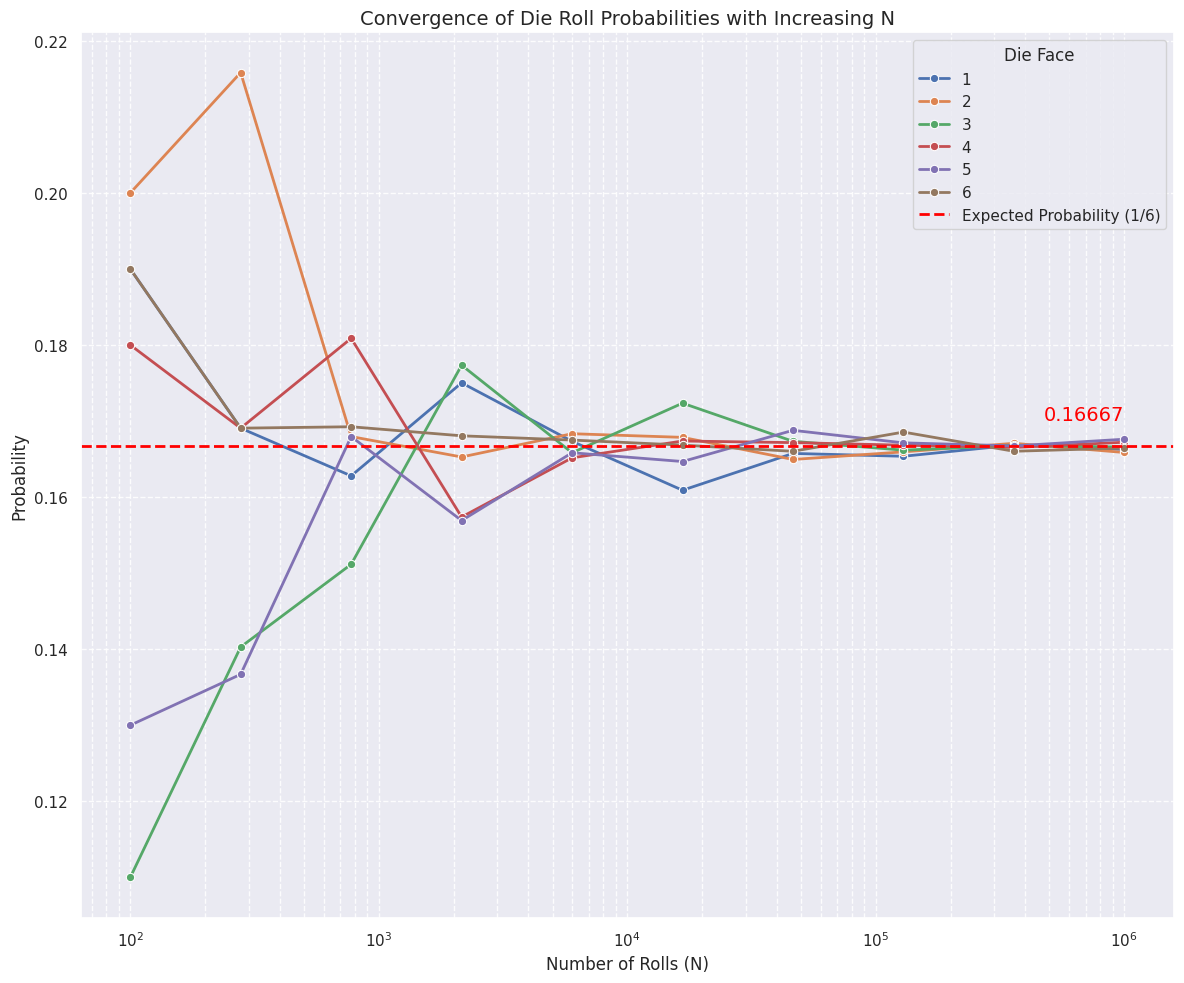

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", palette="deep")

# Define different N values
N = np.logspace(2, 6, num=10, dtype=int)
faces = np.arange(1, 7)
np.random.seed(69)


probabilities = {face: [] for face in faces}
for n in N:
    rolls = np.random.randint(1, 7, size=n)
    for face in faces:
        probabilities[face].append(np.sum(rolls == face) / n)

# Create the plot
plt.figure(figsize=(12, 10))
for face in faces:
    sns.lineplot(x=N, y=probabilities[face], marker='o', label=f"{face}", lw=2)

# Expected probability line (1/6)
plt.text(N[-1], 1/6 + 0.003, "0.16667", color="red", fontsize=14, verticalalignment="bottom", horizontalalignment="right")
plt.axhline(1/6, color='red', linestyle='--', label="Expected Probability (1/6)", lw=2)

# Formatting
plt.xscale('log')  # Log scale for better visualization
plt.xlabel("Number of Rolls (N)", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.title("Convergence of Die Roll Probabilities with Increasing N", fontsize=14)
plt.legend(title="Die Face")
plt.grid(True, which="both", linestyle="--", alpha=0.9)
plt.tight_layout()
plt.show()

## Quiz: Maximizing Your Chances with Two Dice and $1 Million!

**Imagine you’re given two dice and asked to choose a sum of the rolls. If the dice land on your chosen sum, you win $1 million. 🎲💰**

<div style="display: flex; justify-content: center;">
    <img src="media/money-bed-huell.png" style="max-height:90vh;width:80%; margin:auto"/>
</div>

**Which sum do you pick?**


But which sum should you pick? Let's figure out the most likely outcome and increase your chances!

When rolling two six-sided dice, the possible sums range from 2 to 12. But not all sums are equally likely. Some sums appear more often than others. Why? Let’s break it down.

Possible outcomes:
A roll of (1, 1) gives a sum of 2.
A roll of (6, 6) gives a sum of 12.
There are multiple combinations that can lead to the same sum, such as (1, 5) and (2, 4) both summing to 6.

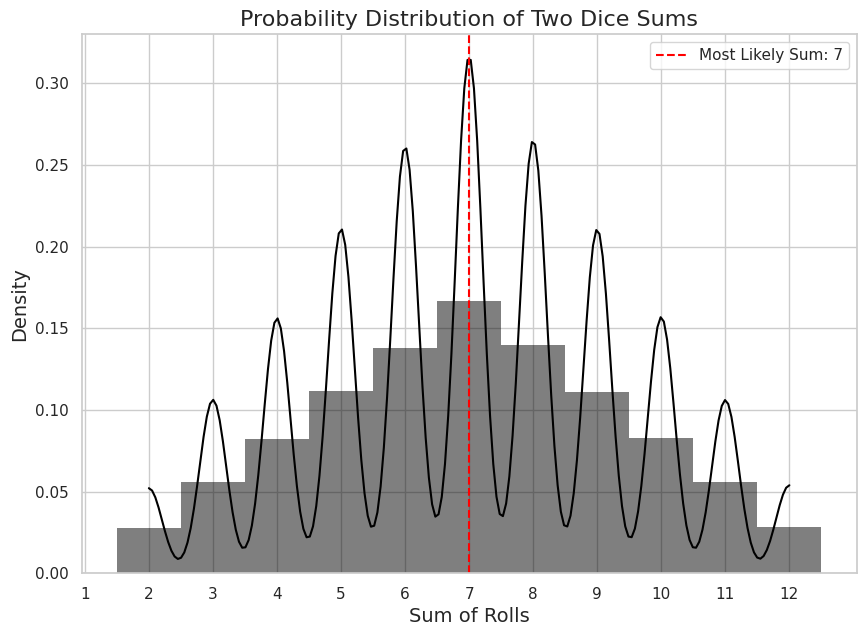

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", palette="dark")

# Simulate rolling two dice 100k times
N = 200000
np.random.seed(69)
dice_rolls = np.random.randint(1, 7, size=(N, 2))  # Rolls of two dice

# Calculate the sum of each roll
sums = np.sum(dice_rolls, axis=1)

# Plotting the distribution
plt.figure(figsize=(10, 7))
sns.histplot(sums, bins=np.arange(2, 14) - 0.5, kde=True, color="black", stat="density", linewidth=0)

# Formatting
plt.title("Probability Distribution of Two Dice Sums", fontsize=16)
plt.xlabel("Sum of Rolls", fontsize=14)
plt.xticks(np.arange(1, 13, 1)) 
plt.ylabel("Density", fontsize=14)
plt.axvline(x=7, color='red', linestyle='--', label="Most Likely Sum: 7")
plt.legend()
plt.show()


Here are the probabilities for each possible sum when rolling two six-sided dice, converted to percentages:  

- **2 → 2.78%**  (1/36)  
- **3 → 5.56%**  (2/36)  
- **4 → 8.33%**  (3/36)  
- **5 → 11.11%** (4/36)  
- **6 → 13.89%** (5/36)  
- **7 → 16.67%** (6/36)  ← **Highest chance**  
- **8 → 13.89%** (5/36)  
- **9 → 11.11%** (4/36)  
- **10 → 8.33%** (3/36)  
- **11 → 5.56%** (2/36)  
- **12 → 2.78%** (1/36)  

The best choice is **7**, as it has the highest probability of 16.67%.

## What is the probability that at least two employees at JPMC have the exact same number of hairs on their heads?

The probability is almost **100%** (or effectively **1**) due to the **Pigeonhole Principle**.

### Explanation:
- The number of possible **distinct hair counts** on a human head is at most **150,000**.
- **J.P. Morgan Chase** has over **300,000 employees**.
- Since **300,000 > 150,000**, the **Pigeonhole Principle** guarantees that at least **two employees must have the exact same number of hairs**.

Thus, the probability is **1 (or 100%)**, assuming no extreme biological exceptions.


<!-- ![pigeonhole.png](media/pigeonhole.jpg) -->
<div style="display: flex; justify-content: center;">
    <img src="media/pigeonhole.jpg" style="max-height:90vh;width:80%; margin:auto"/>
</div>

## What about at least three employees with the exact same hair count?

This follows from the **generalized Pigeonhole Principle**, which states:

> If more than **k × n** objects are placed into **n** containers, then at least one container must contain more than **k** objects.

### Explanation:
- Here, the "objects" are **300,000 employees**.
- The "containers" are **150,000 possible hair counts**.
- Since **300,000+ > 2 × 150,000** at least one hair count must be shared by at least **three employees**.

Thus, the probability of at least **three employees having the exact same hair count** is also **100% (or 1)**.

## **Uniform Distribution and Python’s `random()` Function**  

<!-- ![uniform.png](media/uniform.png) -->
<div style="display: flex; justify-content: center;">
    <img src="media/uniform.png" style="max-height:90vh;width:50%; margin:auto"/>
</div>

### **What is Uniform Distribution?**  
A **uniform distribution** is a probability distribution where **all outcomes are equally likely**. In the **continuous case**, the probability density function (PDF) is:  

$$
f(x) =
\begin{cases}
\frac{1}{b - a}, & a \leq x \leq b \\
0, & \text{otherwise}
\end{cases}
$$

where:
- $ a $ is the lower bound
- $ b $ is the upper bound  

### **Python’s `random()` Function**
The function `random.random()` in Python **generates a random float** uniformly in the range **$$0.0, 1.0)**.  

It is based on the **Mersenne Twister algorithm**, which is a **pseudo-random number generator (PRNG)** with a period of $ 2^{19937} - 1 $, ensuring **high-quality randomness**.

### **Example: Generating Uniform Random Numbers**

In [75]:
import random

# Generate 5 random numbers uniformly distributed in [0, 1)
random_numbers = [random.random() for _ in range(5)]
print(random_numbers)

[0.8907613652062257, 0.17212123326950068, 0.6476756313763062, 0.7080302438295336, 0.42289777300658427]


### **Using NumPy for Uniform Distribution**
The NumPy equivalent is `numpy.random.uniform(a, b, size)`, which generates values in $ [a, b) $.

In [76]:
import numpy as np

# Generate 10 random numbers from U(2, 8)
random_numbers = np.random.uniform(2, 8, 10)
print(random_numbers)

[6.14516089 5.24210854 5.50586265 5.62499428 3.8408776  7.15708038
 2.4028739  7.07406229 5.39470464 3.36926162]


### **Visualizing Uniform Distribution**  
Now, let’s plot a histogram to see how values are uniformly spread:

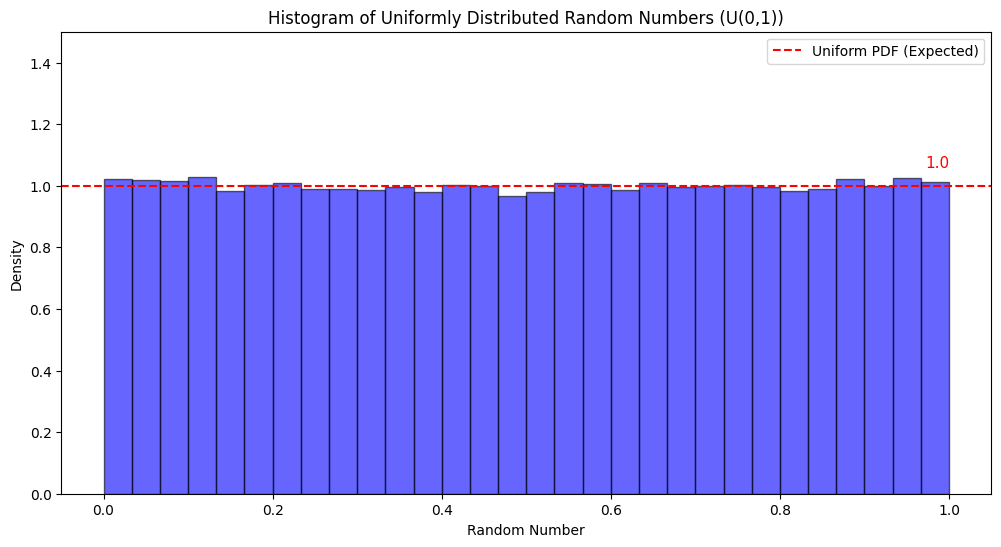

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 10,000 random numbers from U(0,1)
np.random.seed(69)
data = np.random.uniform(0, 1, 100000)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, density=True, color='blue', alpha=0.6, edgecolor='black')
plt.axhline(y=1, color='red', linestyle="--", label="Uniform PDF (Expected)")
plt.text(1.0, 1.05, "1.0", color="red", fontsize=11, verticalalignment="bottom", horizontalalignment="right")
plt.ylim(0, 1.5)
plt.title("Histogram of Uniformly Distributed Random Numbers (U(0,1))")
plt.xlabel("Random Number")
plt.ylabel("Density")
plt.legend()
plt.show()

## 50 Challenging Problems in Probability

<!-- ![fifty-challenging-problems-in-probability.png](media/fifty-challenging-problems-in-probability.png) -->
<div style="display: flex; justify-content: center;">
    <img src="media/fifty-challenging-problems-in-probability.png" style="max-height:90vh;width:50%; margin:auto"/>
</div>

Here are a few classic problems from "50 Challenging Problems in Probability" by Frederick Mosteller, along with Python-based solutions. These problems highlight how we can bridge the gap between math and code using simulations.

## Problem 31: Birthday Pairings

What is the least number of persons required if the probability exceeds 1/2 that two or more of them have the same birthday?

This is a classic **birthday problem**, where we determine the minimum number of people needed so that the probability of at least two sharing a birthday exceeds $ \frac{1}{2} $.

### Probability of No Shared Birthdays
Assuming 365 days in a year (ignoring leap years), the probability that $ n $ people all have different birthdays is:

$$
P(n) = \frac{365}{365} \times \frac{364}{365} \times \frac{363}{365} \times \dots \times \frac{365 - n + 1}{365}
$$

The probability that at least two people share a birthday is:

$$
1 - P(n)
$$

### Step 2: Finding the Smallest $ n $ for atleast 1 shared birthday
We find the smallest $ n $ such that:

$$
1 - P(n) > \frac{1}{2}
$$

Using known values or calculations, we find:

$$
P(22) \approx 0.524
$$

Since this exceeds $\frac{1}{2}$, the minimum number of people required is: $\mathbf{23}$

Thus, **23 people** is the least number required for the probability to exceed $ \frac{1}{2} $ that at least two share a birthday.

### When Does It Reach 1?
- When $ n = 365 $, there is still a tiny chance that everyone has a unique birthday.
- When $ n = 366 $, by the **pigeonhole principle**, at least two people **must** share a birthday, since there are only 365 possible birthdays.

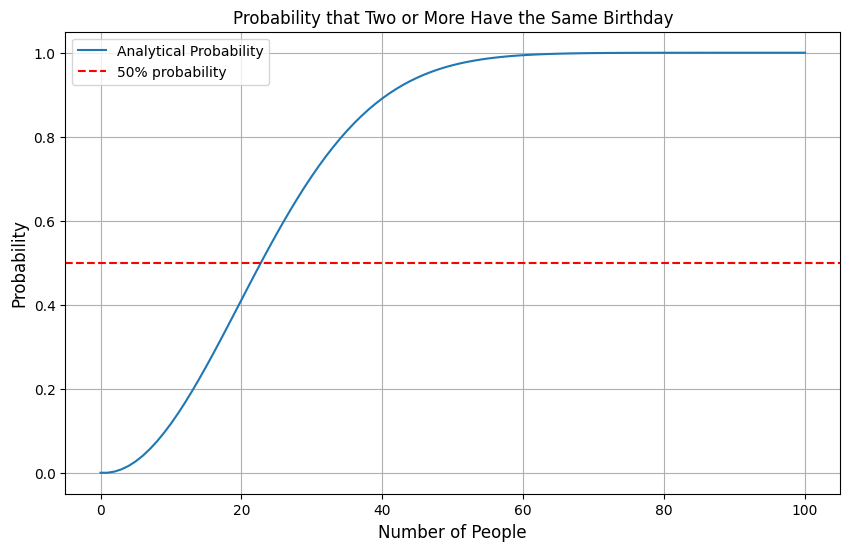

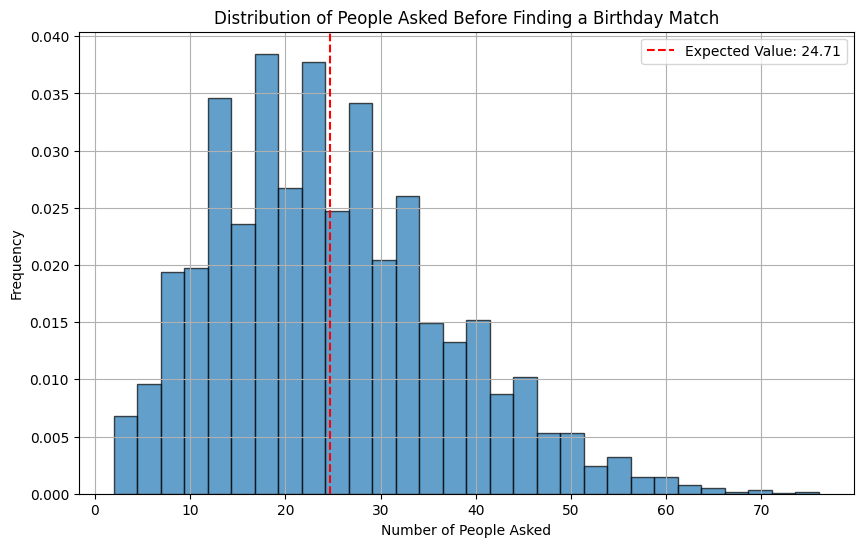

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

def birthday_paradox_simulation(num_people, num_trials=10000):
    """Simulate the birthday problem and compute the probability of a shared birthday."""
    count_shared = 0
    
    for _ in range(num_trials):
        birthdays = np.random.randint(0, 365, size=num_people)  # Random birthdays from 0 to 364
        if len(birthdays) != len(set(birthdays)):  # Check for duplicates
            count_shared += 1
    
    return count_shared / num_trials

# Compute probabilities using analytical method
probs = []
for N in range(101):
    probs.append(1 - (factorial(365) / (factorial(365 - N) * 365**N)))

# Find the minimum N where probability exceeds 1/2
threshold_index = next(i for i, p in enumerate(probs) if p > 0.5)


# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(101), probs, linestyle='-', label='Analytical Probability')
plt.axhline(0.5, linestyle='dashed', color='r', label='50% probability')
plt.xlabel('Number of People', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Probability that Two or More Have the Same Birthday')
plt.legend()
plt.grid(True)
plt.show()

# Simulation for expected number of people to find a birthday match
def expected_people_for_match(num_trials=10000):
    results = []
    
    for _ in range(num_trials):
        seen_birthdays = set()
        count = 0
        while True:
            new_birthday = np.random.randint(0, 365)
            count += 1
            if new_birthday in seen_birthdays:
                results.append(count)
                break
            seen_birthdays.add(new_birthday)
    
    return np.mean(results), results

expected_value, all_counts = expected_people_for_match()
print()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(all_counts, bins=30, edgecolor='black', alpha=0.7, density=True)
plt.axvline(expected_value, color='r', linestyle='dashed', label=f'Expected Value: {expected_value:.2f}')
plt.xlabel('Number of People Asked')
plt.ylabel('Frequency')
plt.title('Distribution of People Asked Before Finding a Birthday Match')
plt.legend()
plt.grid(True)
plt.show()

## Problem 25: Lengths of Random Chords

If a chord is selected at random on a fixed circle, what is the probability that its length exceeds the radius of the circle?

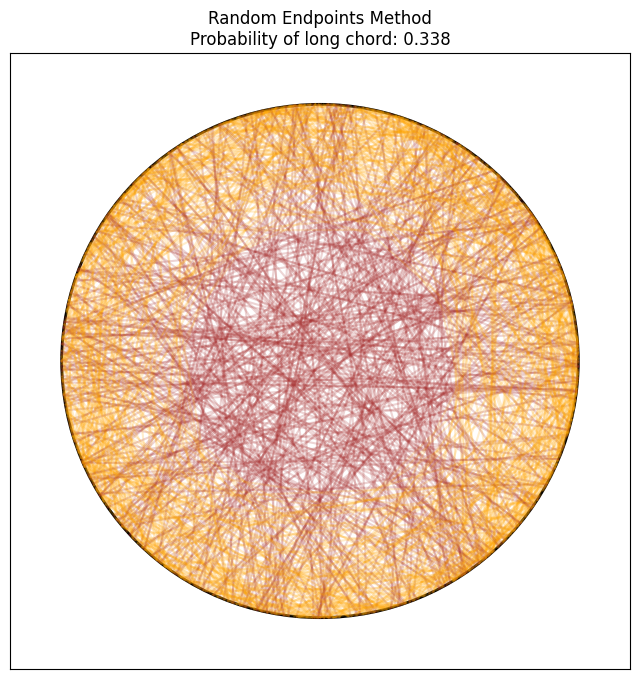

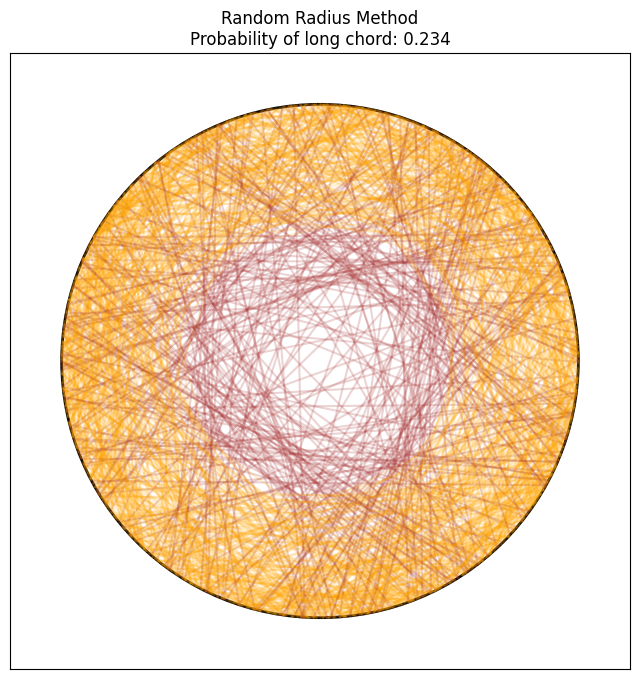

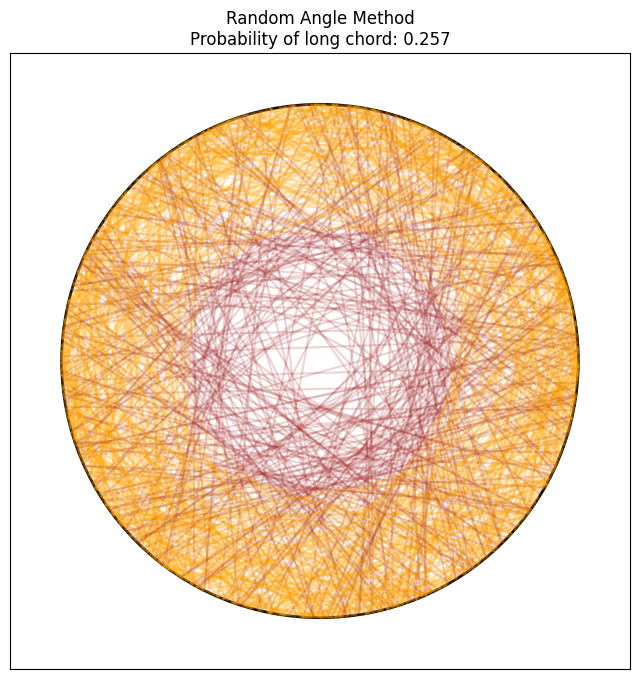

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def random_endpoint_method():
    center = np.array([0, 0])
    radius = 1
    theta1, theta2 = np.random.uniform(0, 2 * np.pi, 2)
    p1 = radius * np.array([np.cos(theta1), np.sin(theta1)])
    p2 = radius * np.array([np.cos(theta2), np.sin(theta2)])
    chord_length = np.linalg.norm(p2 - p1)
    return p1, p2, chord_length

def random_radius_method():
    center = np.array([0, 0])
    radius = 1
    r = np.sqrt(np.random.uniform(0, radius**2))
    theta = np.random.uniform(0, 2 * np.pi)
    midpoint = r * np.array([np.cos(theta), np.sin(theta)])
    d = np.sqrt(radius**2 - r**2)
    p1 = midpoint + np.array([-d * np.sin(theta), d * np.cos(theta)])
    p2 = midpoint + np.array([d * np.sin(theta), -d * np.cos(theta)])
    chord_length = 2 * d
    return p1, p2, chord_length

def random_angle_method():
    center = np.array([0, 0])
    radius = 1
    theta = np.random.uniform(0, 2 * np.pi)  # Random angle
    d = radius * np.sqrt(np.random.uniform(0, 1))  # Correctly randomizing chord midpoint distance

    # Midpoint of the chord
    midpoint = d * np.array([np.cos(theta), np.sin(theta)])

    # Chord half-length using perpendicular chord theorem
    chord_half_length = np.sqrt(radius**2 - d**2)

    # Compute endpoints using perpendicular vector
    perp_vector = np.array([-np.sin(theta), np.cos(theta)])  # Perpendicular unit vector
    p1 = midpoint + chord_half_length * perp_vector
    p2 = midpoint - chord_half_length * perp_vector

    chord_length = 2 * chord_half_length
    return p1, p2, chord_length


def visualize_bertrand(method, n=1000, title=""): 
    fig, ax = plt.subplots(figsize=(8,8))
    circle = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=2)
    ax.add_patch(circle)
    
    long_chord_count = 0
    threshold_length = np.sqrt(3)
    
    for _ in range(n):
        p1, p2, chord_length = method()
        color = 'brown' if chord_length > threshold_length else 'orange'
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color=color, alpha=0.2)
        if chord_length > threshold_length:
            long_chord_count += 1
    
    probability = long_chord_count / n
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{title}\nProbability of long chord: {probability:.3f}")
    plt.show()

# Run visualization for all methods
visualize_bertrand(random_endpoint_method, 1000, "Random Endpoints Method")
visualize_bertrand(random_radius_method, 1000, "Random Radius Method")
visualize_bertrand(random_angle_method, 1000, "Random Angle Method")


## Quiz: First person to accurately explain what's being showcased here wins a goodie coupon!

<div style="display: flex; justify-content: center;">
    <img src="media/Pi_monte_carlo_all.gif" style="max-height:90vh;width:40%; margin:auto"/>
</div>

## **Monte Carlo Simulation Using Uniform Random Numbers**  

Monte Carlo methods use **random sampling** to estimate numerical results. Since `random.random()` generates values uniformly in $[0,1)$, we can use it in various simulations.

### **Estimating π Using Uniform Random Numbers**
One classic Monte Carlo simulation is estimating **π** by randomly sampling points in a unit square and checking how many fall inside the unit circle.

#### **Idea**:
- Generate **random points** $ (x, y) $ in the square $[-1,1] \times [-1,1]$.
- Count how many points lie inside the circle and thus satisfy $ x^2 + y^2 \leq 1 $
- The ratio of points inside to total points approximates **π**, so:

$$
\pi \approx 4 \times \frac{\text{Points inside circle}}{\text{Total points}}
$$


Estimated π ≈ 3.13480


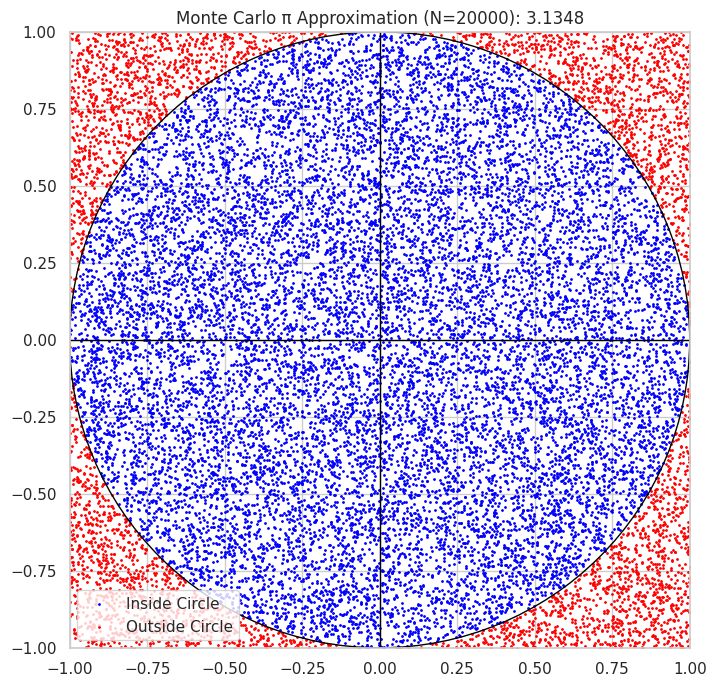

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Number of random points
np.random.seed(420)
N = 20000

# Generate N random (x, y) points
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

# Check if points fall inside the unit circle (quarter-circle)
inside_circle = x**2 + y**2 <= 1

# Estimate π
pi_estimate = 4 * np.sum(inside_circle) / N
print(f"Estimated π ≈ {pi_estimate:.5f}")

# Visualization
plt.figure(figsize=(8, 8))
plt.scatter(x[inside_circle], y[inside_circle], color="blue", s=1, label="Inside Circle")
plt.scatter(x[~inside_circle], y[~inside_circle], color="red", s=1, label="Outside Circle")
plt.axhline(0, color="black", linewidth=1)
plt.axvline(0, color="black", linewidth=1)
circle = plt.Circle((0, 0), 1, color="black", fill=False)
plt.gca().add_patch(circle)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title(f"Monte Carlo π Approximation (N={N}): {pi_estimate}")
plt.legend()
plt.show()

## **Convergence of Monte Carlo π Estimate**  

1. We **vary $ N $ logarithmically** from **10 to 1,000,000**.
2. For each $ N $:
   - Generate $ N $ random points $ (x, y) $ in $[0,1] \times [0,1]$.
   - Count how many fall **inside** the quarter-circle.
   - Compute **π approximation** as $ 4 \times \frac{\text{inside points}}{N} $.
3. We **plot π estimates** as a function of $ N $, using a **log scale** on the x-axis.
4. A **dashed red line** shows the actual value of **π**.


Here’s the **convergence plot** for π as a function of $ N $, showing how the Monte Carlo estimate improves as we increase the number of random points.  

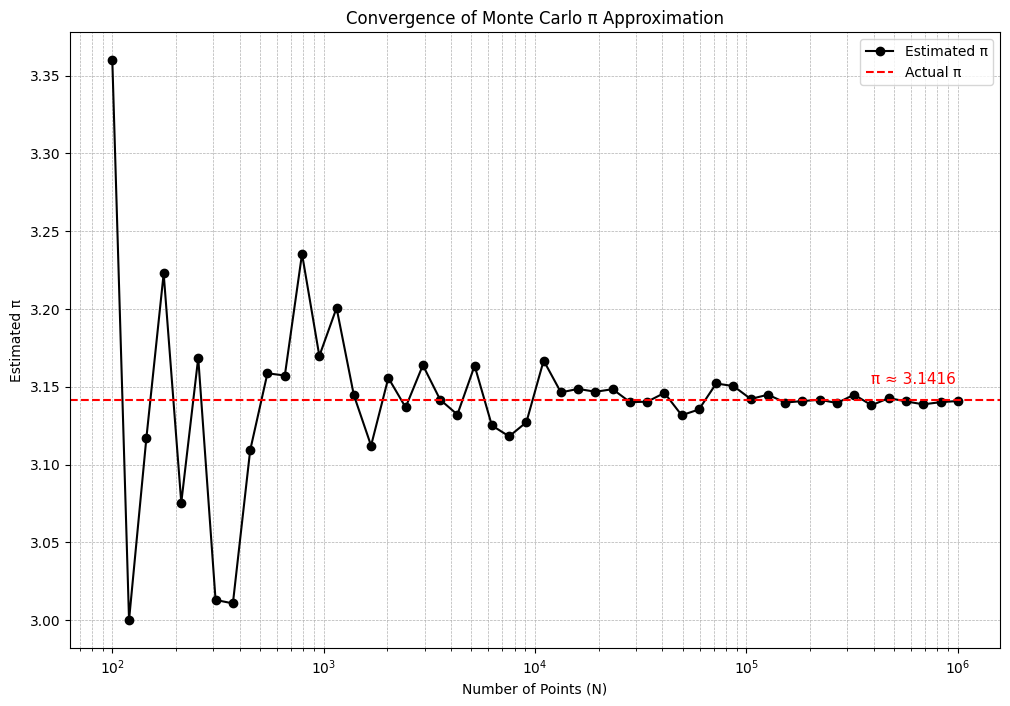

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of N values (powers of 10)
np.random.seed(69)
N = np.logspace(2, 6, dtype=int)  # From 10 to 1,000,000

pi_estimates = []  # Store estimated π values

# Monte Carlo simulation for different N values
for n in N:
    x = np.random.uniform(0, 1, n)
    y = np.random.uniform(0, 1, n)
    inside_circle = np.sum(x**2 + y**2 <= 1)
    pi_estimate = 4 * inside_circle / n
    pi_estimates.append(pi_estimate)

# Plot convergence of π
plt.figure(figsize=(12, 8))
plt.plot(N, pi_estimates, marker='o', linestyle='-', color='black', label="Estimated π")
plt.axhline(y=np.pi, color='red', linestyle="--", label="Actual π")
plt.xscale('log')  # Log scale for better visualization
plt.text(N[-6], 3.15, "π ≈ 3.1416", color="red", fontsize=11, verticalalignment="bottom")
plt.xlabel("Number of Points (N)")
plt.ylabel("Estimated π")
plt.title("Convergence of Monte Carlo π Approximation")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


### **What is a Pseudo-Random Number Generator (PRNG)?**  

A **Pseudo-Random Number Generator (PRNG)** is an algorithm that produces sequences of numbers that **appear random** but are actually **deterministic** and generated using a mathematical function.  

PRNGs are **not truly random** because they start from an initial **seed value** and follow a defined algorithm to generate the next number in the sequence.

---

### **How PRNGs Work**
1. **Start with a seed** $ S_0 $ (a fixed starting value).
2. **Apply a recurrence relation** to generate new values:
   $$
   S_{n+1} = f(S_n)
   $$
   where $ f $ is a deterministic function.
3. **Output the generated sequence**, which appears random but is fully predictable if the seed is known.

#### **Example: Linear Congruential Generator (LCG)**
A simple PRNG is the **Linear Congruential Generator (LCG)**:

$$
X_{n+1} = (aX_n + c) \mod m
$$

where:
- $ X_n $ is the current number,
- $ a $, $ c $, and $ m $ are constants.

⚠️ **LCG is not cryptographically secure** but is used in many applications.

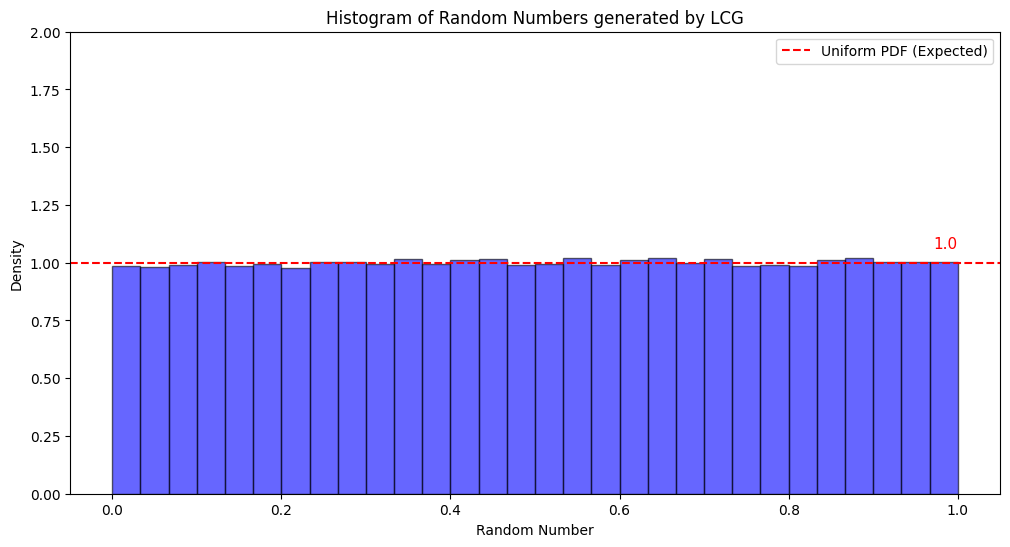

In [27]:

def lcg(seed, a=1664525, c=1013904223, m=2**32):
    """Simple Linear Congruential Generator (LCG)"""
    return (a * seed + c) % m

# Generate a sequence
seed = 42
random_numbers = []
for _ in range(100000):
    seed = lcg(seed)
    random_numbers.append(seed / 2**32)  # Normalize to [0,1)
    
# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(random_numbers, bins=30, density=True, color='blue', alpha=0.6, edgecolor='black')
plt.axhline(y=1, color='red', linestyle="--", label="Uniform PDF (Expected)")
plt.text(1.0, 1.05, "1.0", color="red", fontsize=11, verticalalignment="bottom", horizontalalignment="right")
plt.ylim(0, 2)
plt.title("Histogram of Random Numbers generated by LCG")
plt.xlabel("Random Number")
plt.ylabel("Density")
plt.legend()
plt.show()

### **True Random vs. Pseudo-Random**
| Feature           | PRNG (Pseudo-Random) | True Random (TRNG) |
|------------------|---------------------|--------------------|
| **Deterministic** | ✅ Yes (if seed known) | ❌ No |
| **Reproducible** | ✅ Yes | ❌ No |
| **Speed** | ⚡ Fast (Purely algorithmic) | 🐢 Slower (Hardware-based) |
| **Source** | Algorithm (e.g., Mersenne Twister) | Physical randomness (e.g., radioactive decay, thermal noise) |
| **Used in** | Simulations, games, Monte Carlo | Cryptography, security keys |

For cryptographic applications, **use `secrets` module**:

**`secrets` — Generate secure random numbers for managing secrets**

Source code: Lib/secrets.py

The secrets module is used for generating cryptographically strong random numbers suitable for managing data such as passwords, account authentication, security tokens, and related secrets.

In [39]:
import secrets

print(secrets.token_bytes(64))  # Generate a cryptographically secure 32-bit number

b'1m\t\xd2-\x86\xac\xe8Es\xafr\xaa\x9c\xbeGj\x12j\xc7\x1b\x14\xad\xa4.\x1e\xd2\xb5u\x06\x8a\x01(i\xbd\xf5%\xb9b\x9f\x8dV\xcd3\x82\\\xcc\x9f\xbc\x9a\xbcH\xb1\xe9\xae\x19s\x02\xc9\xb4y\x00A\xc6'


References:

1. By Ainali - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=3141713
2. By Kmhkmh - Own work, CC BY 4.0, https://commons.wikimedia.org/w/index.php?curid=140013480
3. The NCISverse on X: "What do you think is going on here?! Just THREE DAYS until #NCIS returns and you get to find out: https://x.com/ncisverse/status/1043534386581393409